Тестовое задание 

Стажёр в команду Core ML

---
Выполнила: Софья Марцинович

---
**Формулировка задания**


Реализуйте максимально эффективным образом алгоритм иерархической кластеризации с алгоритмом объединения single-link clustering для точек,
расположенных на прямой. 


Опишите алгоритм, а также найдите пример, когда подобный алгоритм показывает «плохие» результаты.

---

**Описание алгоритма** 

**Иерархическая кластеризация данных**

Мы рассматриваем агломеративную кластеризацию, как наиболее общий тип иерархической
кластеризации. 

Результат иерархической кластеризации
представляется в древообразном представлении
наблюдений, называемом дендрограммой. 

Дендрограмма строится, начиная с
листьев, и объединяет кластеры к корню дерева. 

**ШАГ 1: **

Строительство начинается с того, что мы определяем каждую точку 
(datapoint) как отдельный кластер (т.е. на первом этапе у нас N точек и N кластеров).

Считаем, что расстояние между точками определяет их "похожесть" или "непохожесть".  Чем ближе точки (кластеры) друг к другу, тем более они похожи. 

**ШАГ 2: **

Ищем наименьшее расстояние между друмя разными точками (кластерами) и объединяем их в один кластер. 
Можно постоить дистанционную матрицу (distance matrix).
На главной диагонали стоят нули  -  расстояние между точкой и ей самой. 

**ШАГ 3: **

Сравниваем расстояния между новым, объединенным кластером и всеми прочими кластерами. 

Повторяем шаг 2 до тех пор, пока не останется один кластер, содержащий N элементов.

Как определить расстояние между кластерами, содержащими несколько наблюдений?

Концепция расстояния между парами точек(в общем случае - наблюдений) должна быть расширена на пары групп (наблюдений). Это расширение достигается с помощью разработки понятия связи (linkage), которое определяем расстояние между группами. Наиболее общие типы связей -- complete-linkage, average-linkage, single-linkage.

По условию мы должны использовать метод single-linkage clustering, который определяет расстояние между кластерами как кратчайшее расстояние от любого члена одного кластера до любого члена другого кластера. 

Еще один важный параметр - distance metrics ('euclidean' , 'Manhattan", 'hamming', 'cosine' и т.д.) - определяет меру "несхожести". В данной задаче за меру принимается Евклидово расстояние. В более сложных задачах иногда предпочтительнее использовать другие меры. Например, расстояние, основанное на корреляции, считает, что два наблюдения подобны, если их характеристики высоко коррелированы, даже если наблюдаемые значения находятся далеко в терминах Евклидова расстояния.

Поскольку в нашей задаче по условию все точки лежат на одной прямой, то мы можем упростить Distance metrics и считать "расстоянием между точками" - расстояние между ними по оси Х. 

---












**Подготовка к работе**

In [0]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.cluster.hierarchy import distance

from pylab import rcParams
import seaborn as sb
from matplotlib import pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

**Генерирование данных**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


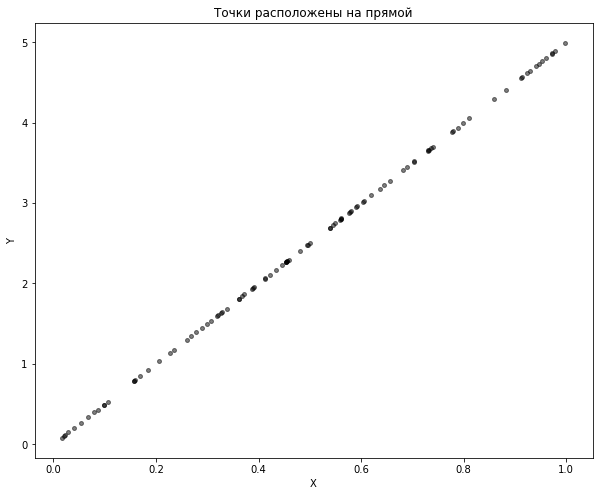

In [0]:
N = 100    # Количество точек (объектов)

X = np.random.rand(N)
Y = X*5
colors = (0,0,0)
area = np.pi*5

# График
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, s=area, c=colors, alpha=0.5)
plt.title('Точки расположены на прямой')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Строим дендрограмму**

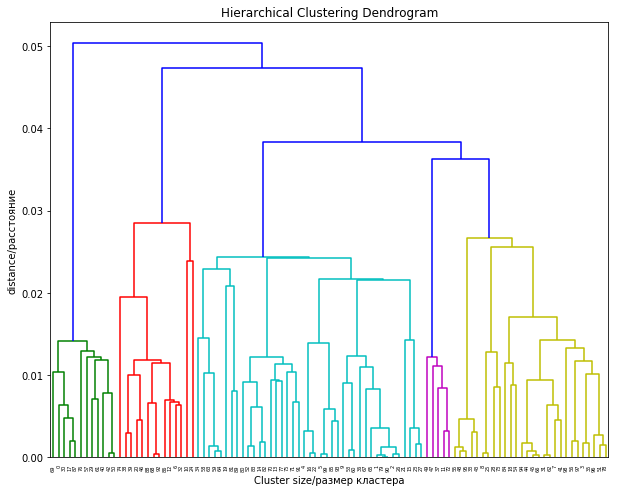

In [0]:
X = [[i] for i in X]
Z = linkage(X, 'single')
plt.figure(figsize=(10, 8))
dn = dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size/размер кластера')
plt.ylabel('distance/расстояние')
plt.show()

**Dendrogram Truncation / Усечение дендрограмы**

Усечение делает дендрограмму более читаемой. Чем больше данных, тем сложнее анализировать исходную дендрограмму. 

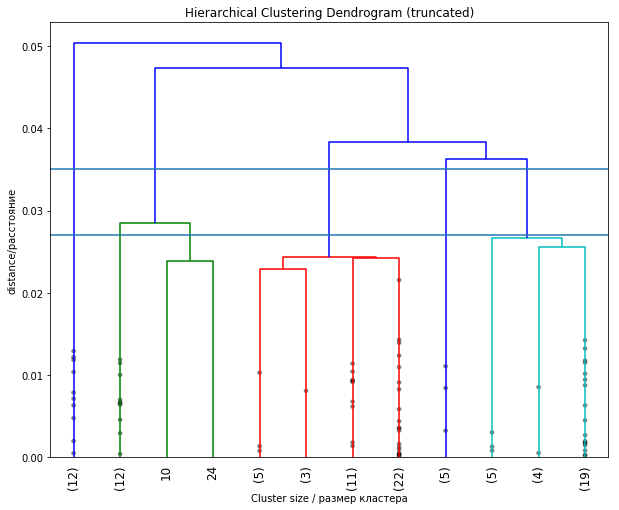

In [0]:
plt.figure(figsize=(10, 8))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster size / размер кластера')
plt.ylabel('distance/расстояние')
plt.axhline(y=0.035)  # проводим линии, чтобы определить необходимое нам количество кластеров
plt.axhline(y=0.027)


dendrogram(
    Z,
    truncate_mode='lastp',  # показывает последние объединенные кластеры
    p=12,  # показывает последние 12 кластеров
    show_leaf_counts=True,  # количество объектов в кластере
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # дает представление о распределении в отрезанных ветвях
)
plt.show()






---





**Желаемое количество кластеров**

Выделяем нужное на наш взгляд количество кластеров. 
Для этого используется функция fcluster. 

In [0]:
k=5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 5, 3, 3, 2, 5, 5, 3, 2, 4, 2, 3, 3, 3, 3, 1, 5, 3, 2, 3,
       3, 3, 2, 5, 3, 3, 5, 1, 1, 5, 2, 5, 3, 5, 3, 4, 2, 2, 1, 5, 1, 5,
       5, 5, 2, 4, 5, 4, 1, 5, 3, 3, 5, 5, 5, 1, 3, 3, 3, 1, 5, 3, 3, 3,
       5, 3, 2, 1, 3, 3, 4, 5, 2, 3, 1, 3, 5, 3, 3, 3, 3, 3, 5, 3, 2, 1,
       2, 3, 3, 3, 2, 3, 5, 5, 5, 5, 5, 3], dtype=int32)

Картинка ниже дает 5 кластеров, обозначенные разными цветами.

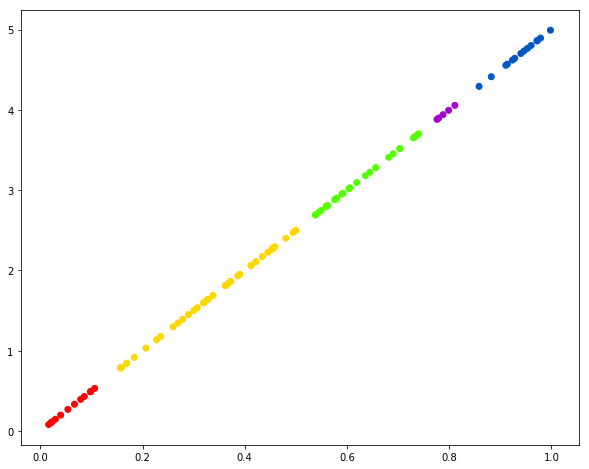

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()



---






Или мы можем ограничить количество кластеров, исходя из расстояния, которое можно подсмотреть в дендограмме.
Для этого определяем max_d и получаем результат.

In [0]:
from scipy.cluster.hierarchy import fcluster
max_d = 0.028
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 4, 4, 6, 4, 4, 2, 6, 6, 4, 3, 5, 2, 4, 4, 4, 4, 1, 6, 4, 2, 4,
       4, 4, 3, 6, 4, 4, 6, 1, 1, 6, 2, 6, 4, 6, 4, 5, 2, 2, 1, 6, 1, 6,
       6, 6, 2, 5, 6, 5, 1, 6, 4, 4, 6, 6, 6, 1, 4, 4, 4, 1, 6, 4, 4, 4,
       6, 4, 2, 1, 4, 4, 5, 6, 2, 4, 1, 4, 6, 4, 4, 4, 4, 4, 6, 4, 2, 1,
       2, 4, 4, 4, 2, 4, 6, 6, 6, 6, 6, 4], dtype=int32)

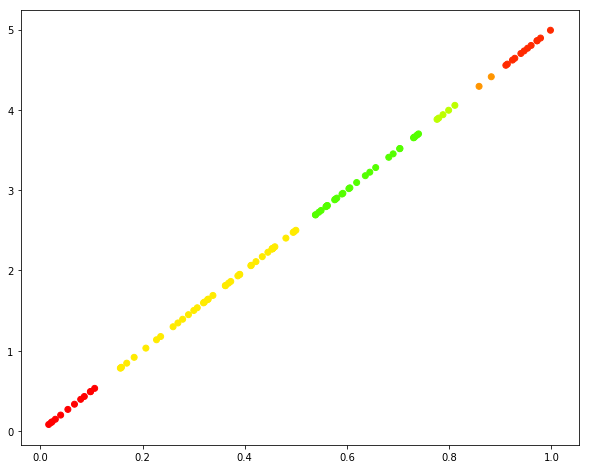

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(X, Y, c=clusters, cmap='prism')  
plt.show()

---

**Когда подобный алгоритм показывает «плохие» результаты...**


Недостатки алгоритма single-linkage clustering:

1.   Большое количесвто данных долго обрабатывается.
2.   Сложно определиться с оптимальным конечным количеством кластеров при разрезании дендрограммы.
3.   Алгоритм дает неточное решение, если точки расположены "густо" или пересекаются/накладываются . На разреженных данных задачу кластеризации решить легче.
4.   Алгоритм single-linkage clustering дает протяженные и растянутые кластеры, которые не достаточно сбалансированы (по сравнению с результатами работы алгоритмов complete- и average-linkage clustering).
